## Introduction

**Diabetes** is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy

Without ongoing, careful management, diabetes can lead to a buildup of sugars in the blood, which can increase the risk of dangerous complications, including stroke and heart disease.

Different kinds of diabetes can occur, and managing the condition depends on the type. Not all forms of diabetes stem from a person being overweight or leading an inactive lifestyle. In fact, some are present from childhood.

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Part 1 - Data Preprocessing

## Importing Important Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


## Importing the Dataset

In [2]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Handling Missing Data

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Even though we can see that there are no missing data in the dataset but if we look closer in this data, we find out that there are a lot of values as zero in features that make no sense. Like having zero blood pressure is not possible for someone who is alive.

So, we need to take care of this value. 



In [4]:
f = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for _ in f:
    print(_,"= ",(data[_]==0).sum())   

Pregnancies =  111
Glucose =  5
BloodPressure =  35
SkinThickness =  227
Insulin =  374
BMI =  11
DiabetesPedigreeFunction =  0
Age =  0


## **5 popular ways for data imputation for cross-sectional datasets:**

**Do Nothing**:

That’s an easy one. You just let the algorithm handle the missing data. Some algorithms can factor in the missing values and learn the best imputation values for the missing data based on the training loss reduction (ie. XGBoost)However, other algorithms will panic and throw an error complaining about the missing values (ie. Scikit learn — LinearRegression). In that case, you will need to handle the missing data and clean it before feeding it to the algorithm.

**Imputation Using (Mean/Median) Values**:

This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.

Pros:
  * Easy and fast.
  * Works well with small numerical datasets.

Cons:
  * Doesn’t factor the correlations between features. It only works on the column level.
  * Will give poor results on encoded categorical features (do NOT use it on categorical features).
  * Not very accurate.
  * Doesn’t account for the uncertainty in the imputations

**Imputation Using (Most Frequent) or (Zero/Constant) Values**:

Most Frequent is another statistical strategy to impute missing values and YES!! It works with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column.

Pros:
  * Works well with categorical features.

Cons:
  * It also doesn’t factor the correlations between features.
  * It can introduce bias in the data.

**Imputation Using Multivariate Imputation by Chained Equation (MICE)**:

This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns.

**Imputation Using Deep Learning (Datawig)**:

This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training.

Pros:
  * Quite accurate compared to other methods.
  * It has some functions that can handle categorical data (Feature Encoder).
  * It supports CPUs and GPUs.

Cons:
  * Single Column imputation.
  * Can be quite slow with large datasets.
  * You have to specify the columns that contain information about the target column that will be imputed.

In [5]:
data['BMI']=data.BMI.mask(data.BMI == 0,(data['BMI'].mean(skipna=True)))
data['SkinThickness']=data.SkinThickness.mask(data.SkinThickness == 0,(data['SkinThickness'].mean(skipna=True)))
data['BloodPressure']=data.BloodPressure.mask(data.BloodPressure == 0,(data['BloodPressure'].mean(skipna=True)))
data['Glucose']=data.Glucose.mask(data.Glucose == 0,(data['Glucose'].mean(skipna=True)))
print(data.head(15))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0             6    148.0      72.000000      35.000000        0  33.600000   
1             1     85.0      66.000000      29.000000        0  26.600000   
2             8    183.0      64.000000      20.536458        0  23.300000   
3             1     89.0      66.000000      23.000000       94  28.100000   
4             0    137.0      40.000000      35.000000      168  43.100000   
5             5    116.0      74.000000      20.536458        0  25.600000   
6             3     78.0      50.000000      32.000000       88  31.000000   
7            10    115.0      69.105469      20.536458        0  35.300000   
8             2    197.0      70.000000      45.000000      543  30.500000   
9             8    125.0      96.000000      20.536458        0  31.992578   
10            4    110.0      92.000000      20.536458        0  37.600000   
11           10    168.0      74.000000      20.536458        0 

## Binning of Data

Data binning, bucketing is a data pre-processing method used to minimize the effects of small observation errors. The original data values are divided into small intervals known as bins and then they are replaced by a general value calculated for that bin. This has a smoothing effect on the input data and may also reduce the chances of overfitting in case of small datasets

In [6]:
data['Age']=data['Age'].astype(int)
data.loc[data['Age'] <= 16, 'Age']= 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[data['Age'] > 64, 'Age'] = 4

data['Glucose']=data['Glucose'].astype(int)
data.loc[data['Glucose'] <= 80, 'Glucose']= 0
data.loc[(data['Glucose'] > 80) & (data['Glucose'] <= 100), 'Glucose'] = 1
data.loc[(data['Glucose'] > 100) & (data['Glucose'] <= 125), 'Glucose'] = 2
data.loc[(data['Glucose'] > 125) & (data['Glucose'] <= 150), 'Glucose'] = 3
data.loc[data['Glucose'] > 150, 'Glucose'] = 4

data['BloodPressure']=data['BloodPressure'].astype(int)
data.loc[data['BloodPressure'] <= 50, 'BloodPressure']= 0
data.loc[(data['BloodPressure'] > 50) & (data['BloodPressure'] <= 65), 'BloodPressure'] = 1
data.loc[(data['BloodPressure'] > 65) & (data['BloodPressure'] <= 80), 'BloodPressure'] = 2
data.loc[(data['BloodPressure'] > 80) & (data['BloodPressure'] <= 100), 'BloodPressure'] = 3
data.loc[data['BloodPressure'] > 100, 'BloodPressure'] = 4

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3,2,35.000000,0,33.6,0.627,3,1
1,1,1,2,29.000000,0,26.6,0.351,1,0
2,8,4,1,20.536458,0,23.3,0.672,1,1
3,1,1,2,23.000000,94,28.1,0.167,1,0
4,0,3,0,35.000000,168,43.1,2.288,2,1
...,...,...,...,...,...,...,...,...,...
763,10,2,2,48.000000,180,32.9,0.171,3,0
764,2,2,2,27.000000,0,36.8,0.340,1,0
765,5,2,2,23.000000,112,26.2,0.245,1,0
766,1,3,1,20.536458,0,30.1,0.349,2,1


In [7]:
data.drop(['Insulin'], axis = 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,3,2,35.000000,33.6,0.627,3,1
1,1,1,2,29.000000,26.6,0.351,1,0
2,8,4,1,20.536458,23.3,0.672,1,1
3,1,1,2,23.000000,28.1,0.167,1,0
4,0,3,0,35.000000,43.1,2.288,2,1
...,...,...,...,...,...,...,...,...
763,10,2,2,48.000000,32.9,0.171,3,0
764,2,2,2,27.000000,36.8,0.340,1,0
765,5,2,2,23.000000,26.2,0.245,1,0
766,1,3,1,20.536458,30.1,0.349,2,1


## Part 2- Data Visualization

In [8]:
def bar_chart(feature):
    Positive = data[data['Outcome']==1][feature].value_counts()
    Negative = data[data['Outcome']==0][feature].value_counts()
    df = pd.DataFrame([Positive,Negative])
    df.index = ['Positive','Negative']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

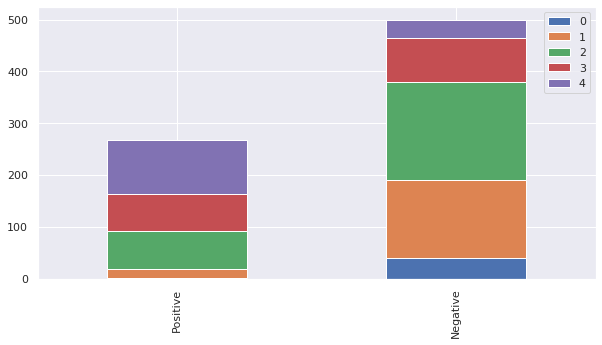

In [9]:
bar_chart('Glucose')

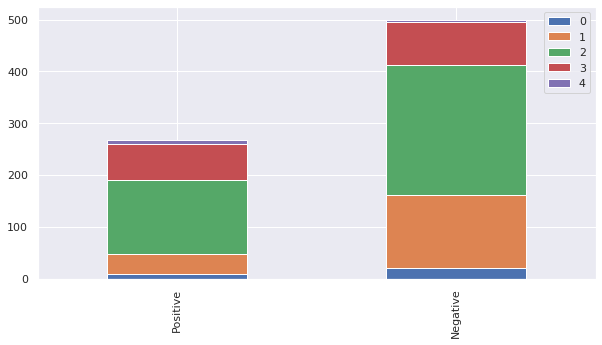

In [10]:
bar_chart('BloodPressure')

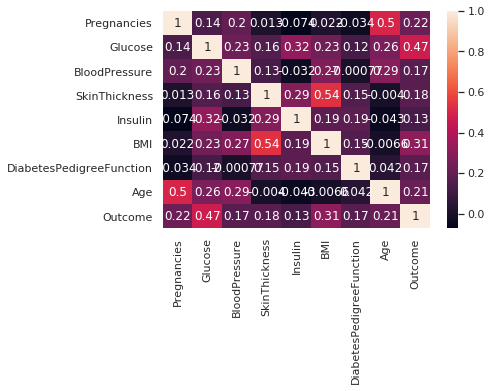

In [11]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True )
plt.show()

Now,

I'm going to separate my dependent varaible and the independent variables into different numpy array.

In [13]:
X = data.iloc[: , :-1].values
y = data.iloc[: , -1].values

## Spliting the dataset for Testing and Training

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.

By default, Sklearn train_test_split will make random partitions for the two subsets. However, you can also specify a random state for the operation.

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2,random_state=0 )

## Scaling Of Data

Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.

*One of the most common forms of pre-processing consists of a simple linear rescaling of the input variables.*

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Part 3- Lets make a ANN

## Importing keras lib and its model

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
q = []
i=[3,4,5,6]
j=[3,4,5,6]

for a in i:
    for b in j:
        #initialising the ANN
        classifier = Sequential()

        #adding the input layer and the first hidden layer
        classifier.add(Dense(activation="relu", input_dim=8, units=a, kernel_initializer="uniform"))

        #adding the second hidden layer
        classifier.add(Dense(output_dim = b, init ='uniform', activation="relu"))

        #adding the output layer
        classifier.add(Dense(output_dim = 1, init ='uniform', activation="sigmoid"))

        #compiling the ANN
        classifier.compile(optimizer = "adam", loss ="binary_crossentropy" , metrics = ['accuracy'])

        #fitting the ANN to the training set
        classifier.fit(X_train,y_train , batch_size = 10 , nb_epoch = 100)
        
        y_pred = classifier.predict(X_test)

        y_pred = (y_pred>0.5)
        from sklearn.metrics import confusion_matrix
        cm = confusion_matrix(y_test,y_pred)
        accuracy=((cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,1]+cm[0,0]+cm[1,0]))
        q.append(accuracy)
        print(q)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3, kernel_initializer="uniform")`
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
614/614 [==============================] - 0s 654us/step - loss: 0.6898 - accuracy: 0.6401
Epoch 2/100
614/614 [==============================] - 0s 126us/step - loss: 0.6773 - accuracy: 0.6401
Epoch 3/100
614/614 [==============================] - 0s 129us/step - loss: 0.6449 - accuracy: 0.6401
Epoch 4/100
614/614 [==============================] - 0s 135us/step - loss: 0.6011 - accuracy: 0.6401
Epoch 5/100
614/614 [==============================] - 0s 132us/step - loss: 0.5707 - accuracy: 0.6401
Epoch 6/100
614/614 [==============================] - 0s 139us/step - loss: 0.5547 - accuracy: 0.6401
Epoch 7/100
614/614 [==============================] - 0s 137us/step - loss: 0.5458 - accuracy: 0.6401
Epoch 8/100
614/614 [==============================] - 0s 133us/step - loss: 0.5391 - accuracy: 0.6401
Epoch 9/100
614/614 [==============================] - 0s 126us/step - loss: 0.5339 - accuracy: 0.6401
Epoch 10/100
614/614 [==============================] - 0s 141us/step - l

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`
  


Epoch 1/100
614/614 [==============================] - 0s 362us/step - loss: 0.6892 - accuracy: 0.6401
Epoch 2/100
614/614 [==============================] - 0s 130us/step - loss: 0.6768 - accuracy: 0.6401
Epoch 3/100
614/614 [==============================] - 0s 125us/step - loss: 0.6516 - accuracy: 0.6401
Epoch 4/100
614/614 [==============================] - 0s 132us/step - loss: 0.6169 - accuracy: 0.6401
Epoch 5/100
614/614 [==============================] - 0s 130us/step - loss: 0.5836 - accuracy: 0.6401
Epoch 6/100
614/614 [==============================] - 0s 120us/step - loss: 0.5615 - accuracy: 0.6401
Epoch 7/100
614/614 [==============================] - 0s 155us/step - loss: 0.5486 - accuracy: 0.6401
Epoch 8/100
614/614 [==============================] - 0s 156us/step - loss: 0.5416 - accuracy: 0.6401
Epoch 9/100
614/614 [==============================] - 0s 152us/step - loss: 0.5363 - accuracy: 0.6401
Epoch 10/100
614/614 [==============================] - 0s 128us/step - l

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  


Epoch 1/100
614/614 [==============================] - 0s 362us/step - loss: 0.6901 - accuracy: 0.6368
Epoch 2/100
614/614 [==============================] - 0s 127us/step - loss: 0.6832 - accuracy: 0.6401
Epoch 3/100
614/614 [==============================] - 0s 129us/step - loss: 0.6722 - accuracy: 0.6401
Epoch 4/100
614/614 [==============================] - 0s 133us/step - loss: 0.6526 - accuracy: 0.6401
Epoch 5/100
614/614 [==============================] - 0s 130us/step - loss: 0.6270 - accuracy: 0.6401
Epoch 6/100
614/614 [==============================] - 0s 126us/step - loss: 0.6010 - accuracy: 0.6401
Epoch 7/100
614/614 [==============================] - 0s 126us/step - loss: 0.5799 - accuracy: 0.6401
Epoch 8/100
614/614 [==============================] - 0s 127us/step - loss: 0.5653 - accuracy: 0.6401
Epoch 9/100
614/614 [==============================] - 0s 144us/step - loss: 0.5550 - accuracy: 0.6401
Epoch 10/100
614/614 [==============================] - 0s 134us/step - l

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  


Epoch 1/100
614/614 [==============================] - 0s 361us/step - loss: 0.6901 - accuracy: 0.6401
Epoch 2/100
614/614 [==============================] - 0s 126us/step - loss: 0.6819 - accuracy: 0.6401
Epoch 3/100
614/614 [==============================] - 0s 125us/step - loss: 0.6651 - accuracy: 0.6401
Epoch 4/100
614/614 [==============================] - 0s 127us/step - loss: 0.6354 - accuracy: 0.6401
Epoch 5/100
614/614 [==============================] - 0s 129us/step - loss: 0.5976 - accuracy: 0.6417
Epoch 6/100
614/614 [==============================] - 0s 125us/step - loss: 0.5648 - accuracy: 0.7052
Epoch 7/100
614/614 [==============================] - 0s 126us/step - loss: 0.5411 - accuracy: 0.7492
Epoch 8/100
614/614 [==============================] - 0s 133us/step - loss: 0.5259 - accuracy: 0.7476
Epoch 9/100
614/614 [==============================] - 0s 126us/step - loss: 0.5161 - accuracy: 0.7557
Epoch 10/100
614/614 [==============================] - 0s 125us/step - l

Printing out the all the possibilities for different number of nodes of hidden layers.

In [21]:
q

[0.8051948051948052,
 0.7922077922077922,
 0.7662337662337663,
 0.8116883116883117,
 0.7857142857142857,
 0.8181818181818182,
 0.8116883116883117,
 0.8181818181818182,
 0.8051948051948052,
 0.8181818181818182,
 0.7792207792207793,
 0.7922077922077922,
 0.8116883116883117,
 0.8051948051948052,
 0.8116883116883117,
 0.7857142857142857]

If you have reached till here, So i hope you liked my notebook.

If you learned anything new from this dataset then do give it a upvote.

I'm a rookie and any suggestion in the comment box is highly appreciated.

If you have any doubt reagrding any part of the notebook, feel free to comment your doubt in the comment box.

What are the ideal Number of nodes according to you for the neural network, comment it in the comment box.

Do you have some specific way to decide the number of nodes for hidden layers , Do tell me in the comments.

Thank you!!